
# AI PROJECT ON RAINFALL TIME SERIES :-

# BUSINESS CASE: Time series forecasting model to predict next month's rainfall based on historical data.

## GROUP ID: PTID-AI-Jul-23-1020

## PROJECT ID: PRAICP-1004-RainfallTS

## DATA COLLECTION :-
* Data Collected form Rubixe For Educational Internship.

# TASK: TIME SERIES :-

## PYTHON IMPLEMENTATION :-

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:00


In [ ]:
# Importing Necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.layers import LSTM

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# To Supress The Warnings
import warnings
warnings.filterwarnings("ignore")

## MOUNT GOOGLE DRIVE :-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(16, 12))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
),
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/AI Expert Project/RainFall Time Series/Data/rainfall-monthly-highest-daily-total.csv",index_col='month',parse_dates=True)

""" Use index_col to set column as a index
parse_date= True to make sure pandas recognize the data in time series format and does not treated the string """

data_1.index.freq='MS'  # Dealing with monthly data

data_1.head()

,maximum_rainfall_in_a_day
month,
1982-01-01,36.5
1982-02-01,9.4
1982-03-01,61.7
1982-04-01,45.1
1982-05-01,33.0


In [ ]:
# Shape of data
data_1.shape

(462, 1)

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/AI Expert Project/RainFall Time Series/Data/rainfall-monthly-number-of-rain-days.csv",index_col='month',parse_dates=True)

""" Use index_col to set column as a index
parse_date= True to make sure pandas recognize the data in time series format and does not treated the string """

data_2.index.freq='MS'  # Dealing with monthly data

data_2.head()

,no_of_rainy_days
month,
1982-01-01,10
1982-02-01,5
1982-03-01,11
1982-04-01,14
1982-05-01,10


In [ ]:
# Shape of data
data_2.shape

(462, 1)

In [ ]:
data_3 = pd.read_csv("/content/drive/MyDrive/AI Expert Project/RainFall Time Series/Data/rainfall-monthly-total.csv",index_col='month',parse_dates=True)

""" Use index_col to set column as a index
parse_date= True to make sure pandas recognize the data in time series format and does not treated the string """

data_3.index.freq='MS'  # Dealing with monthly data

data_3.head()

,total_rainfall
month,
1982-01-01,107.1
1982-02-01,27.8
1982-03-01,160.8
1982-04-01,157.0
1982-05-01,102.2


In [ ]:
# Shape of data
data_3.shape

(462, 1)

In [ ]:
data=pd.concat([data_1,data_2,data_3],axis=1)
print(data.shape)
data.head()

(462, 3)


,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
month,,,
1982-01-01,36.5,10,107.1
1982-02-01,9.4,5,27.8
1982-03-01,61.7,11,160.8
1982-04-01,45.1,14,157.0
1982-05-01,33.0,10,102.2


## BASIC OF DATA :-

In [ ]:
data.tail()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
month,,,
2020-02-01,23.8,8,65.0
2020-03-01,47.4,8,108.8
2020-04-01,51.8,12,188.0
2020-05-01,53.8,16,255.6
2020-06-01,41.0,21,233.8


In [ ]:
# Shape of data
data.shape

(462, 3)

* Dataset contain Total 462 Observation with 3 feature.

In [ ]:
# Columns of data
data.columns

Index(['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall'], dtype='object')

In [ ]:
# Examin the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1982-01-01 to 2020-06-01
Freq: MS
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maximum_rainfall_in_a_day  462 non-null    float64
 1   no_of_rainy_days           462 non-null    int64  
 2   total_rainfall             462 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.4 KB


In [ ]:
# Statistical measures of data
data.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
count,462.000000,462.000000,462.000000
mean,52.358225,13.958874,176.236580
std,35.685122,4.947494,113.296793
min,0.200000,1.000000,0.200000
25%,30.625000,11.000000,89.025000
50%,43.450000,14.000000,158.450000
75%,63.150000,18.000000,237.950000
max,216.200000,27.000000,765.900000


## Visualise historical data :-

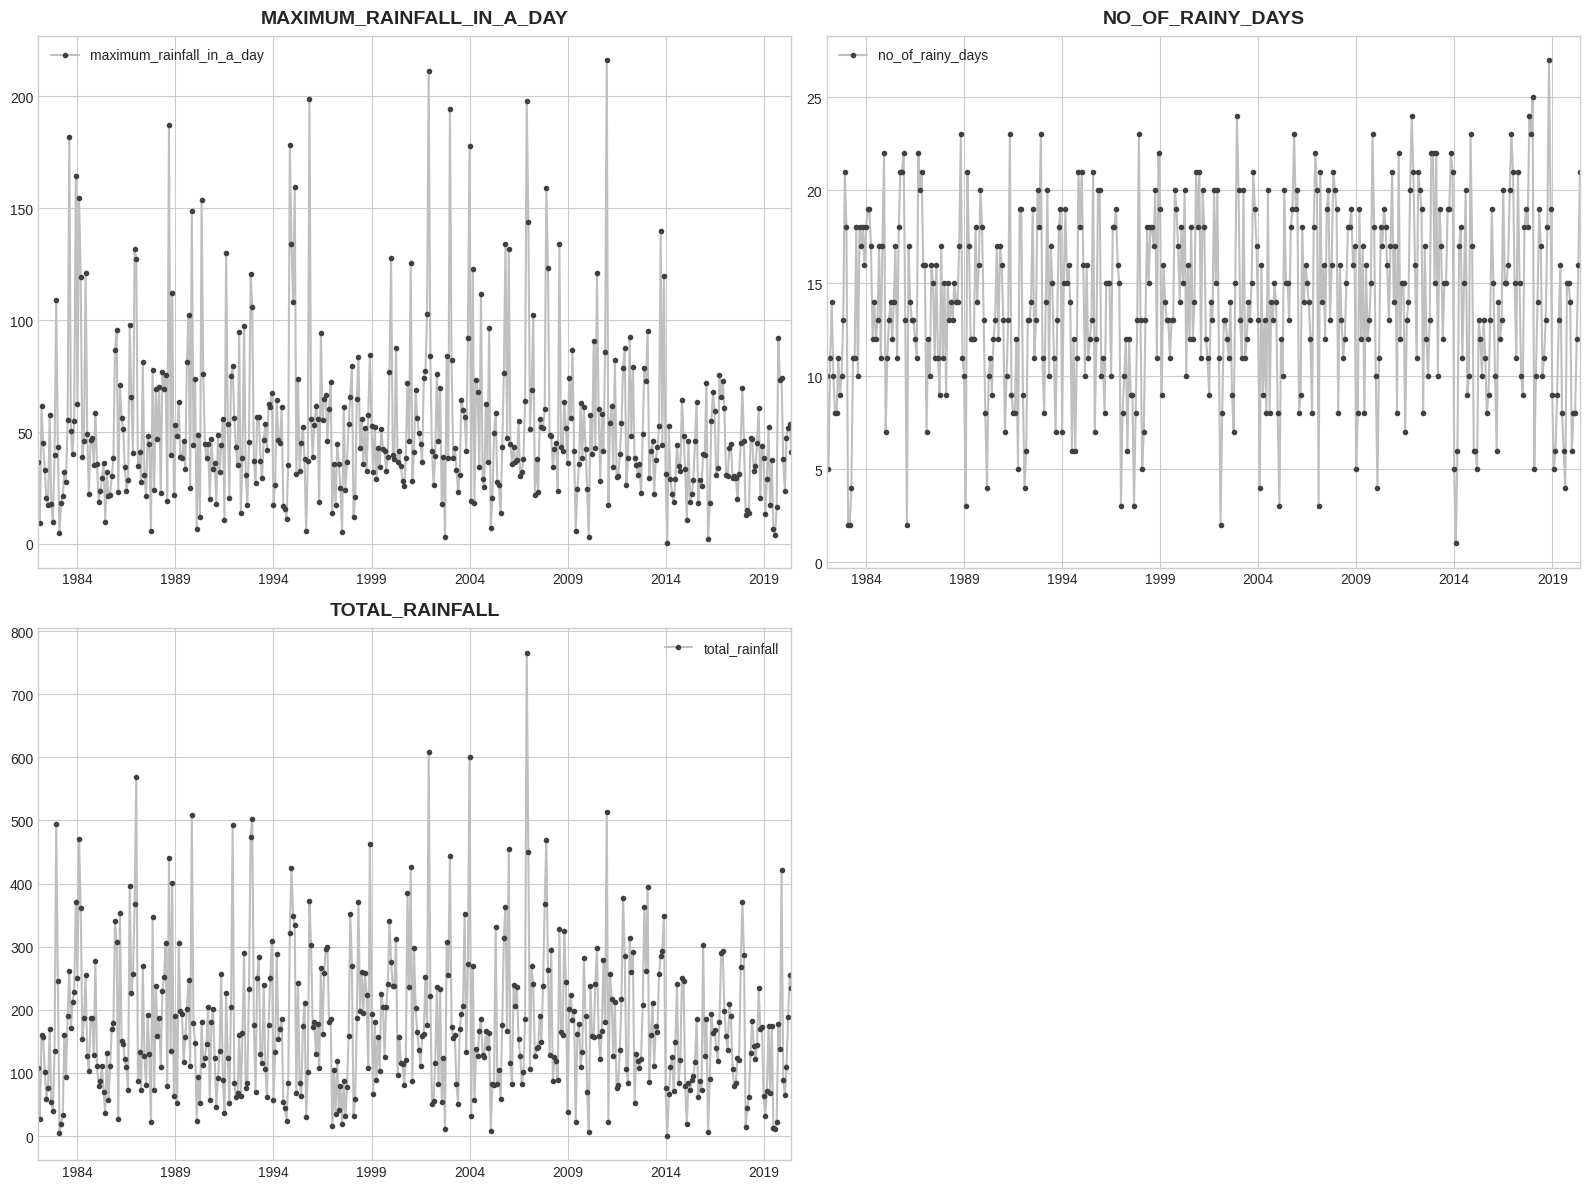

In [ ]:
cols = ['maximum_rainfall_in_a_day','no_of_rainy_days','total_rainfall']

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    data[col].plot(ax=ax,**plot_params)

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

## Visualise the different components like seasonal nature, trend for that we are use stats model :-

### Seasonal Decomposition :-
* A time series data is composed of
    * Trend: Trend is the overall direction of the data.
    *  Seasonlity: Seasonality is a periodic component which repeats itself            within a particulat time period.
    * Residuals: the residual is what’s left over when the trend and                 seasonality have been removed. Residuals are random fluctuations.

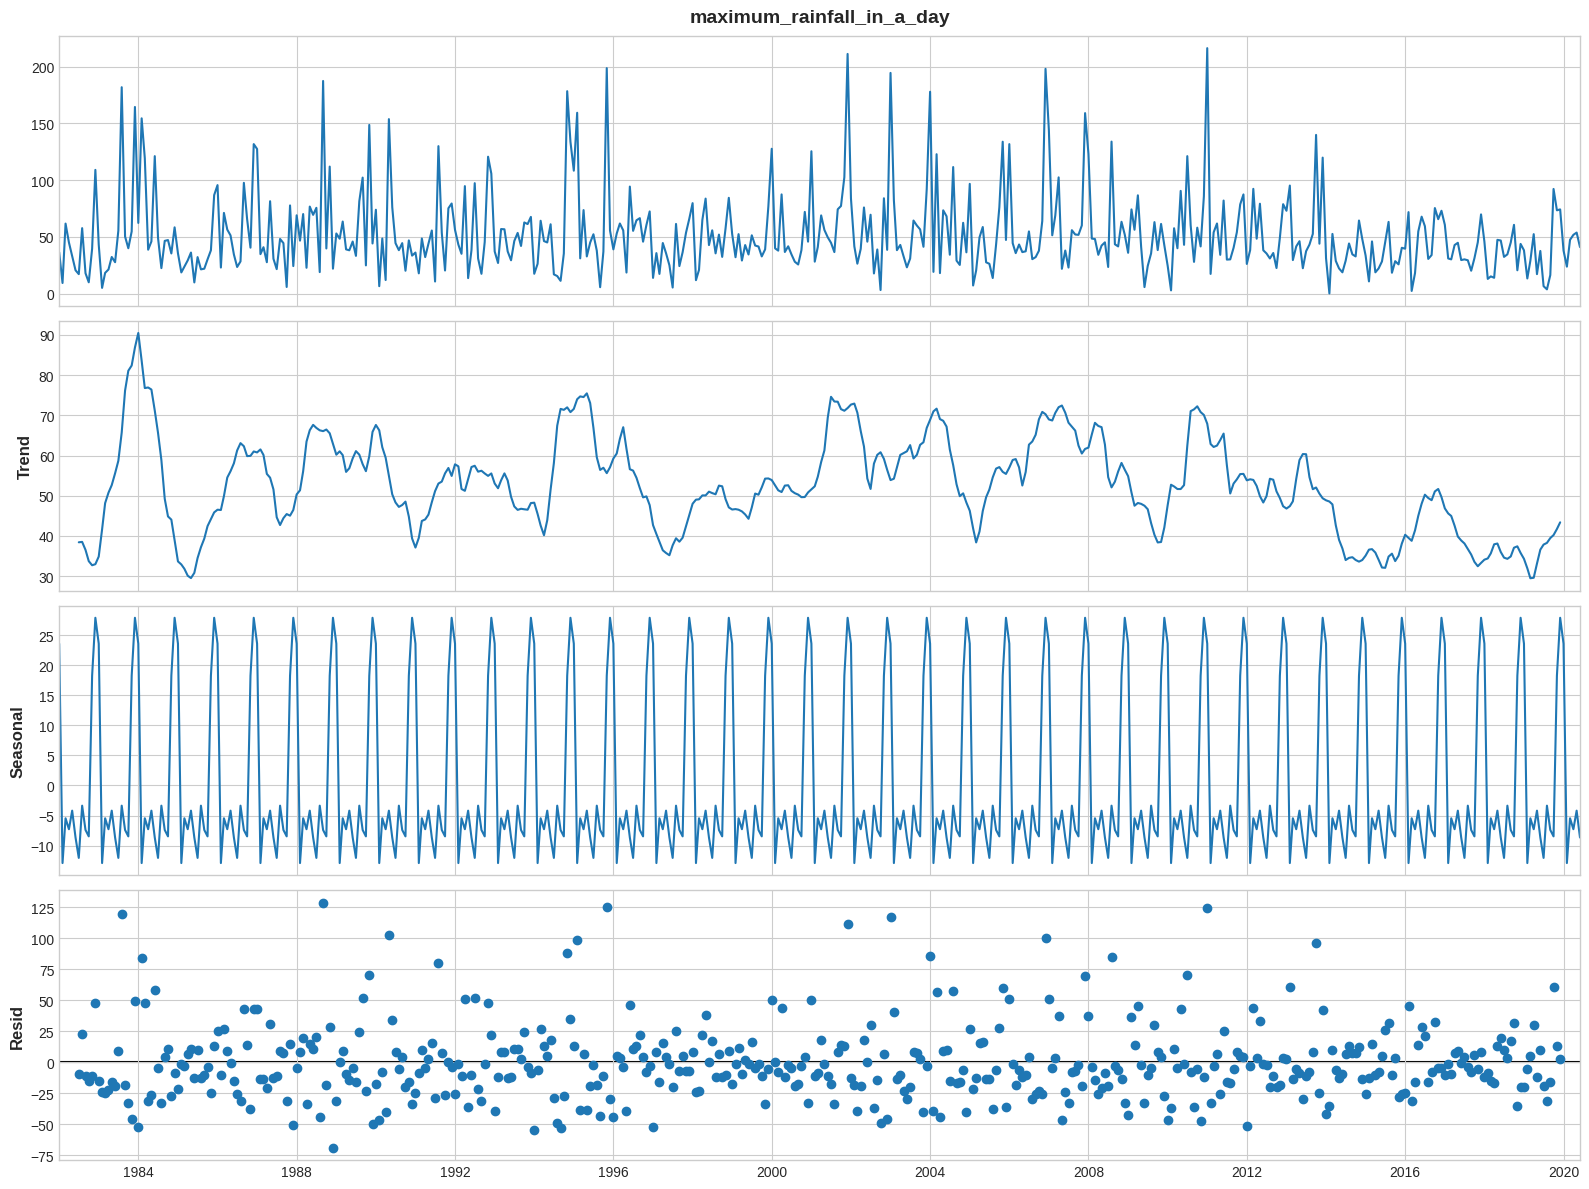

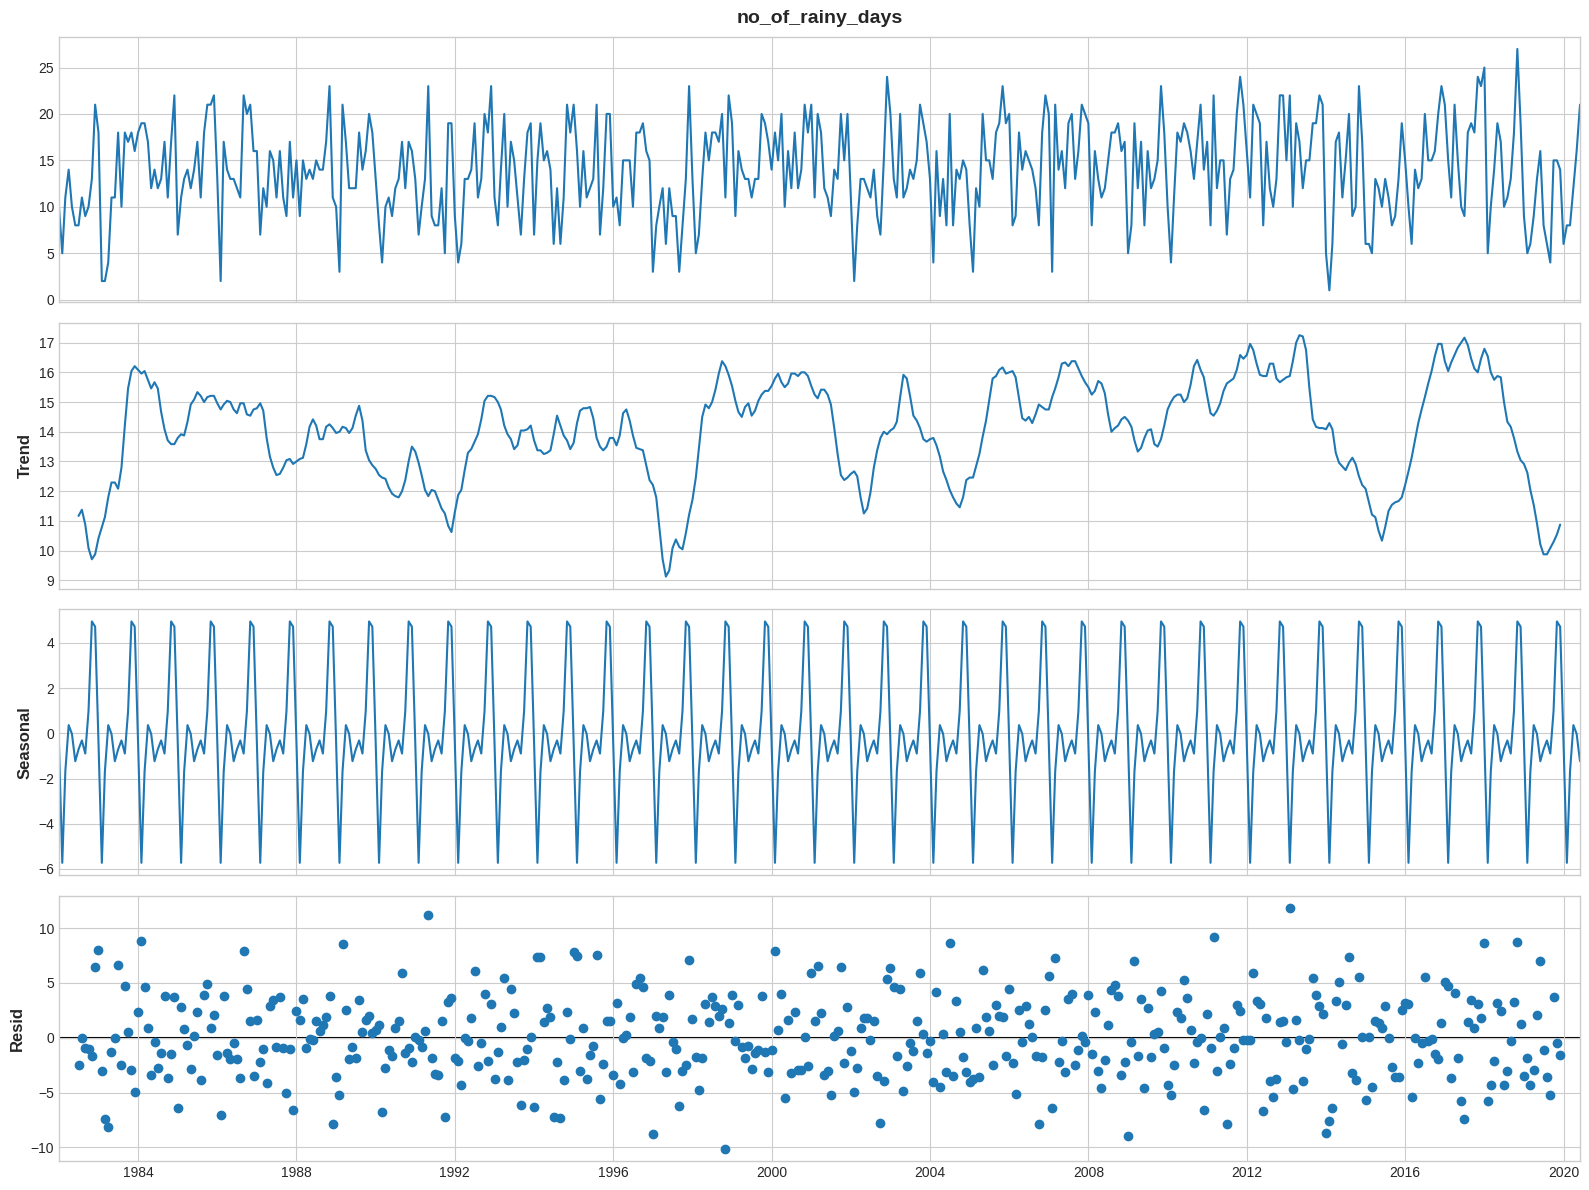

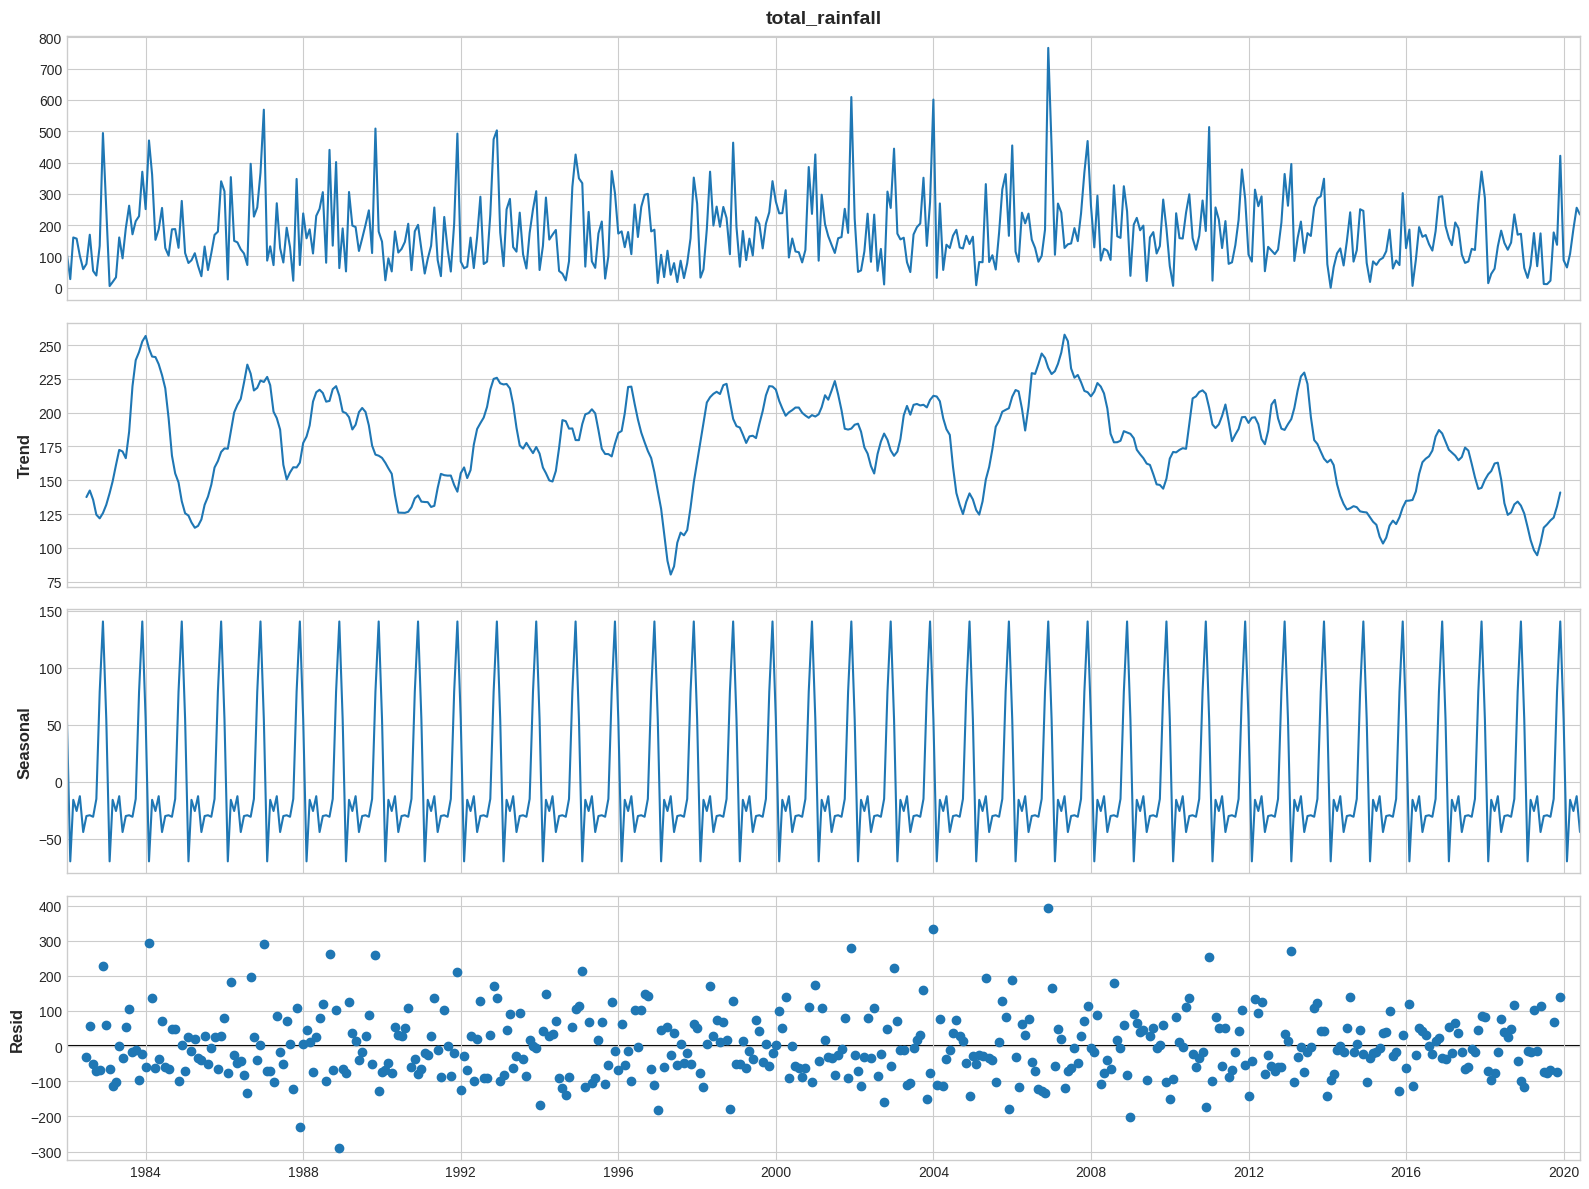

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
for col in cols:
    seasonal_decompose(data[col],period=12).plot()

* Looking at the plot it clearly visible that there is seasonality in the data and some trend.

## Train and Test Split :-
* Train test split in timeseries is different as copared to Machine learning Algforithms. We do random split there where the time component does'nt matters. But in time series we have information dependent on time therefore the spliting is continous without any shuffling of data.

   * Using 37 years data for training (1982-01-01 to 2019-06-01)
   * Using 1 year data for Testing (2019-06-01 to 2020-06-01)

In [ ]:
# Taking last 12 month for testing and remaining data for training
train = data.iloc[:-12]
test  = data.iloc[-12:]


## Create arima-order and seasonal-order by using the auto_arima method from the pmdarima-library :-

In [ ]:
auto_maxRainfall = auto_arima(data["maximum_rainfall_in_a_day"],m=12,seasonal=True)

auto_noRainydays = auto_arima(data["no_of_rainy_days"],m=12,seasonal=True)

auto_totRainfall = auto_arima(data["total_rainfall"],m=12,seasonal=True)

## Fit Models :-

In [ ]:
maxRainfall_model = SARIMAX(train["maximum_rainfall_in_a_day"],order=auto_maxRainfall.order,seasonal_order=auto_maxRainfall.seasonal_order)
maxRainfall_results = maxRainfall_model.fit()

noRainydays_model = SARIMAX(train["no_of_rainy_days"],order=auto_noRainydays.order,seasonal_order=auto_noRainydays.seasonal_order)
noRainydays_results = noRainydays_model.fit()

totRainfall_model = SARIMAX(train["total_rainfall"],order=auto_totRainfall.order,seasonal_order=auto_totRainfall.seasonal_order)
totRainfall_results = totRainfall_model.fit()

## Compare test data with prediction :-

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
prediction_maxRainfall = maxRainfall_results.predict(start=start,end=end,typ="levels").rename("Predicted m_rainfall_in_day")

prediction_noRainydays = noRainydays_results.predict(start=start,end=end,typ="levels").rename("Predicted no_of_rainy_days")

prediction_totRainfall = totRainfall_results.predict(start=start,end=end,typ="levels").rename("Predicted total_rainfall")

In [ ]:
test["maximum_rainfall_in_a_day"].index = pd.to_datetime(test["maximum_rainfall_in_a_day"].index)

test["no_of_rainy_days"].index = pd.to_datetime(test["no_of_rainy_days"].index)

test["total_rainfall"].index = pd.to_datetime(test["total_rainfall"].index)

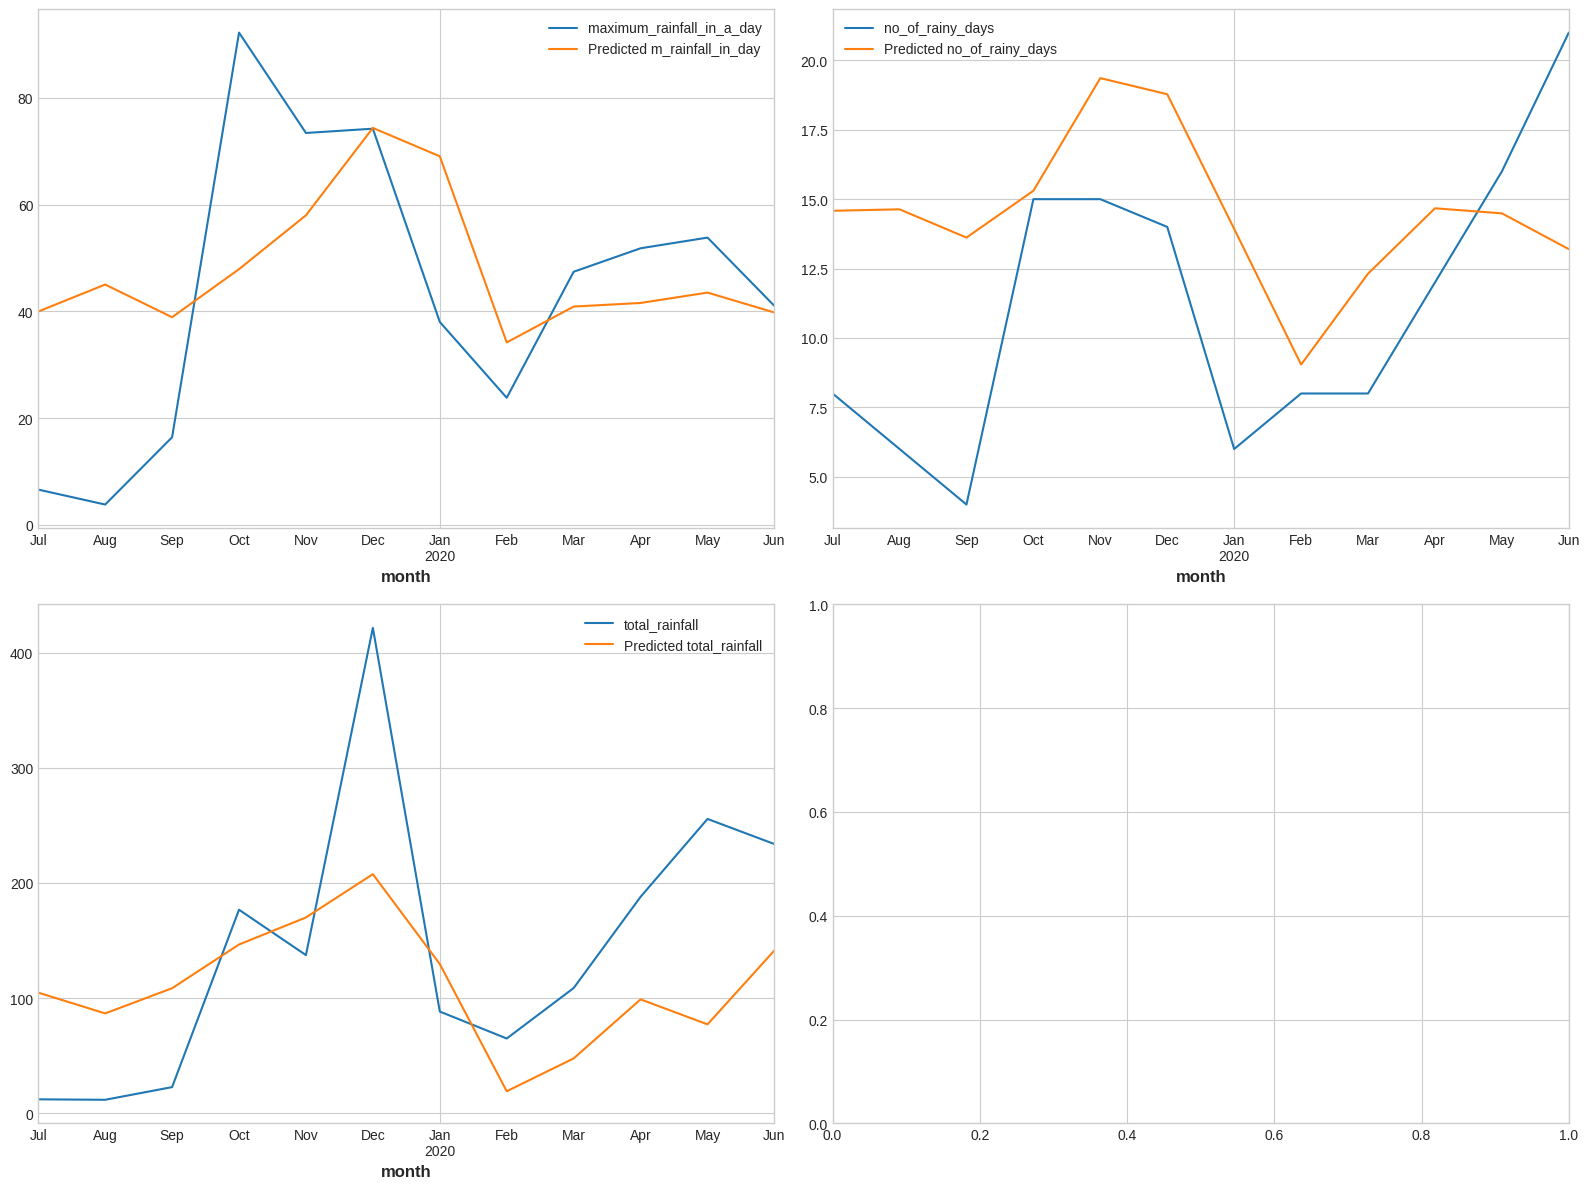

In [ ]:
fig,ax = plt.subplots(2,2)

test["maximum_rainfall_in_a_day"].plot(ax=ax[0,0],legend=True)
prediction_maxRainfall.plot(ax=ax[0,0],legend=True)

test["no_of_rainy_days"].plot(ax=ax[0,1],legend=True)
prediction_noRainydays.plot(ax=ax[0,1],legend=True)

test["total_rainfall"].plot(ax=ax[1,0],legend=True)
prediction_totRainfall.plot(ax=ax[1,0],legend=True)


plt.legend()
plt.show();

## Forecast for 2021 :-

In [ ]:
prediction_maxRainfall = maxRainfall_results.predict(start=len(data),end=len(data)+12,typ="levels").rename("Forecast m_rainfall_in_day")

prediction_noRainydays = noRainydays_results.predict(start=len(data),end=len(data)+12,typ="levels").rename("Forecast no_of_rainy_days")

prediction_totRainfall = totRainfall_results.predict(start=len(data),end=len(data)+12,typ="levels").rename("Forecast total_rainfall")


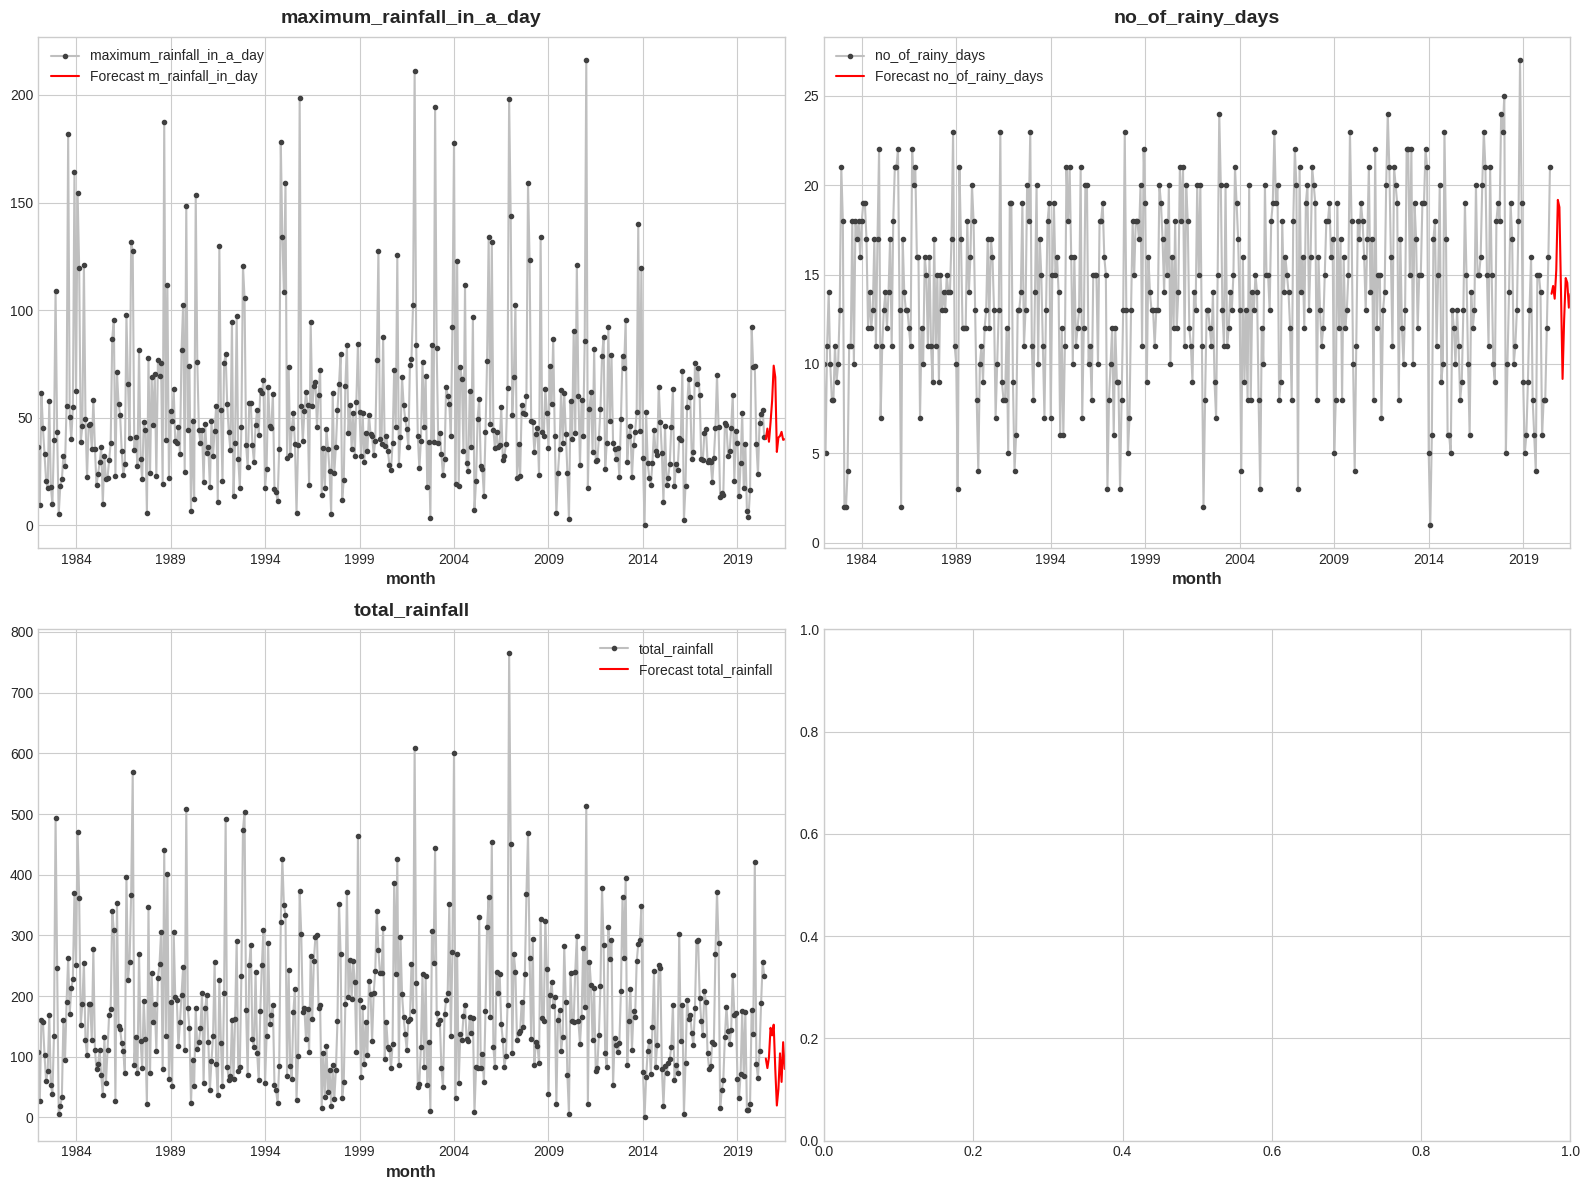

In [ ]:
fig,ax = plt.subplots(2, 2)

data['maximum_rainfall_in_a_day'].plot(ax=ax[0,0],**plot_params)
prediction_maxRainfall.plot(ax=ax[0,0],legend=True,color="red")
ax[0,0].set_title("maximum_rainfall_in_a_day")

data['no_of_rainy_days'].plot(ax=ax[0,1],**plot_params)
prediction_noRainydays.plot(ax=ax[0,1],legend=True,color="red")
ax[0,1].set_title("no_of_rainy_days")

data['total_rainfall'].plot(ax=ax[1,0],**plot_params)
prediction_totRainfall.plot(ax=ax[1,0],legend=True,color="red")
ax[1,0].set_title("total_rainfall")


plt.show()

## save model :-

In [ ]:
import pickle
import statsmodels.api as sm


# Fit the models
maxRainfall_results = maxRainfall_model.fit()
noRainydays_results = noRainydays_model.fit()
totRainfall_results = totRainfall_model.fit()

# Save the SARIMAX models to separate files using pickle
with open('maximum_rainfall_in_a_day.pkl', 'wb') as f:
    pickle.dump(maxRainfall_results, f)

with open('no_of_rainy_days.pkl', 'wb') as f:
    pickle.dump(noRainydays_results, f)

with open('total_rainfall.pkl', 'wb') as f:
    pickle.dump(totRainfall_results, f)

# To load the models later:
with open('maximum_rainfall_in_a_day.pkl', 'rb') as f:
    loaded_maxRainfall_model = pickle.load(f)

with open('no_of_rainy_days.pkl', 'rb') as f:
    loaded_noRainydays_model = pickle.load(f)

with open('total_rainfall.pkl', 'rb') as f:
    loaded_totRainfall_model = pickle.load(f)
